<p style=" background-color:#FF7F50;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><span  style = "padding : 50px; display : block; "><b >Machine Learning Models on AutoScout Dataset: Linear Regression, Ridge, Lasso, and Elastic Net </b></span></p>

# Notebook Explanation
**In this notebook, I used the AutoScout dataset to implement several machine learning algorithms, including Linear Regression, Ridge, Lasso, and Elastic Net. I carefully analyzed the performance of each model by evaluating their scores and selecting the one with the best performance as the final model. Throughout the notebook, I have provided detailed code explanations and comments to make it easier to follow along. This guide will be especially useful for those looking to take their first steps in machine learning, helping you understand key concepts and apply them to real-world datasets**

# About the Dataset

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance

- 11. Prediction

# Import Modules, Load Data and Data Review

In [11]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format

# EDA

In [13]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [14]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [16]:
df0.duplicated().sum()

1673

In [17]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
336,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
337,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
339,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
340,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
341,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,Renault Espace,Van,50950,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1647.000,front,7.600
15820,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15823,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15808,Renault Espace,Van,54982,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1647.000,front,7.600


In [18]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [19]:
duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [20]:
df.describe().T

# Getting to Know the Data

# If the standard deviation (std) is significantly larger than or close to the mean, it suggests that there might be an outlier problem in the dataset overall.

# If there is a significant gap between "min" and the 25th percentile (Q1) and/or between the 75th percentile (Q3) and "max," it indicates that while the dataset may not have a general outlier issue, there could be a limited number of outlier values.


,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [21]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [23]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [25]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())
    
# <20 leaves a 20-character space from the far left up to the ":" symbol, and the feature names are written in this space.
# The ":" symbol is aligned at the same position across all rows.


make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [26]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

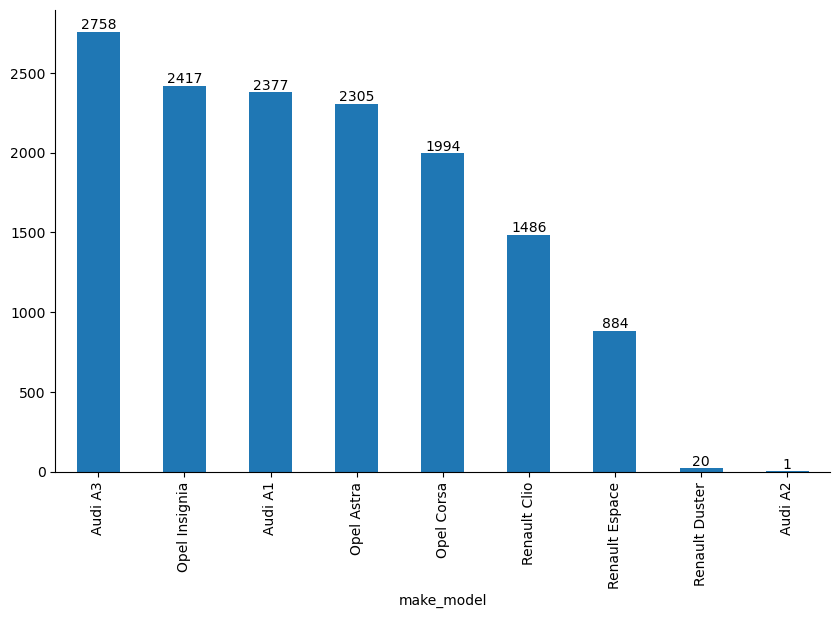

In [27]:
# This code calculates the number of unique values in the "make_model" column of our DataFrame 
# and visualizes these counts using a bar plot.


ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
    
ax.bar_label(ax.containers[0]);

In [28]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [29]:
df.drop(index=[2614], inplace =True)

In [30]:
df.shape

(14241, 23)

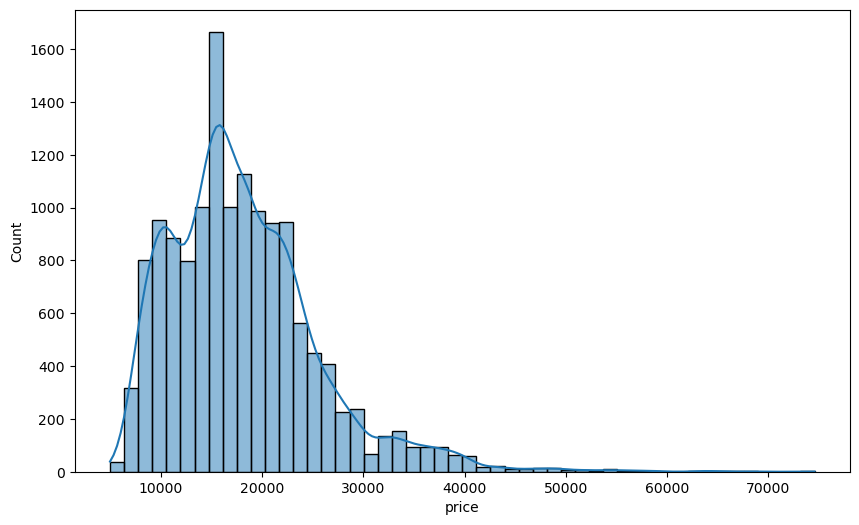

In [31]:
# Since linear models are very sensitive to outliers, I am trying to identify outliers in the data using a histplot.
# In ML, let's not forget that an outlier means that the data belonging to a group or groups is insufficient for training.
# Looking at the visualization below, we see that the number of cars priced over 40,000 EURO is very low. 
# As an initial insight, we can evaluate that the number of cars priced over 40,000 EURO might be insufficient for training. 
# However, we cannot determine whether it is insufficient without conducting the training. 
# We should decide by both dropping the observations considered outliers and training the model without dropping them, 
# then comparing the scores.

# Also, looking at the histplot for the entire dataset might mislead us about outliers. 
# To detect outliers, we should group the data (e.g., Audi A3, Audi A1, Renault Clio, etc.) and detect outliers accordingly.


sns.histplot(df.price, bins=50, kde=True);

In [32]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

# With the code select_dtypes(exclude="number"), we can filter only the object features in the DataFrame.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


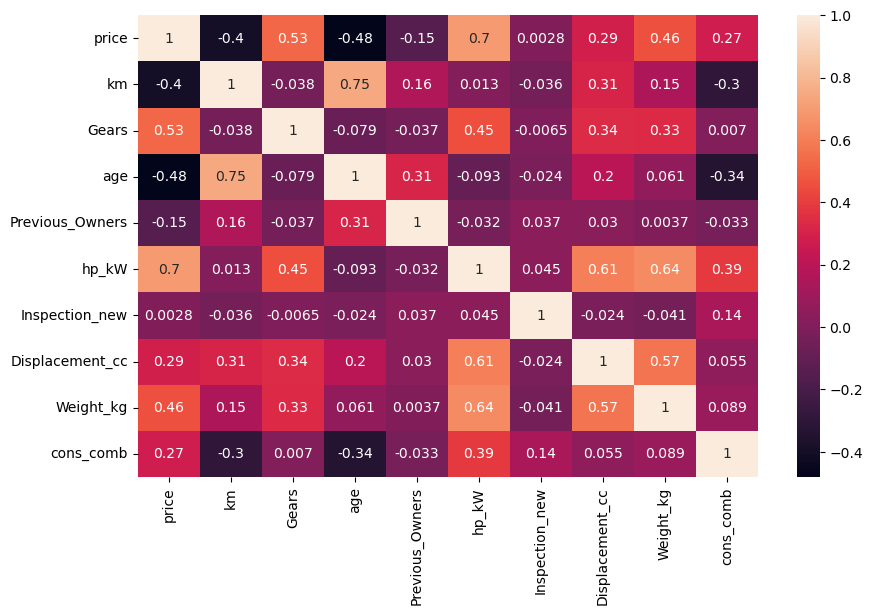

In [33]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

- The multicollinearity problem arises in gradient descent-based models like linear and logistic regression.

- Multicollinearity occurs when there is high correlation between independent variables. This means that when one independent variable is strongly related to others, it can reduce the importance of other independent variables in the model.

- The multicollinearity problem can make it difficult to interpret the model correctly. It becomes challenging to estimate the model coefficients accurately, which might lead to incorrect interpretation of some variables' effects. Therefore, it is crucial to eliminate multicollinearity for accurate results.

- Regularization algorithms address the multicollinearity problem just as they address overfitting issues.

Multicollinearity refers to a situation where independent variables have a high degree of linear relationship. While this can be problematic for some statistical models, it may not be as critical for others.

**Models Sensitive to Multicollinearity:**

1. **Linear Regression**: Linear regression is significantly affected by multicollinearity. High correlation between independent variables can result in unstable coefficient estimates and misleading results, as the model struggles to separate the effects of the independent variables.

2. **Logistic Regression**: Logistic regression, as a type of linear model, is similarly affected by multicollinearity. High correlation between independent variables can reduce the reliability of parameter estimates.

3. **Ridge and Lasso Regression**: Ridge and Lasso regression are regularization techniques that provide robustness against multicollinearity. However, their effectiveness depends on the correct choice of the lambda (regularization parameter). Lambda selection, typically done through cross-validation, is critical to model performance.

**Models Insensitive to Multicollinearity:**

1. **Decision Trees**: Decision trees and tree-based models (e.g., Random Forest) are not affected by relationships between independent variables because they work by splitting data based on specific criteria and evaluate each variable individually.

2. **Support Vector Machines (SVM)**: SVMs are unaffected by multicollinearity, especially with the proper kernel function. The model separates data points with an optimal hyperplane, and correlations between variables do not pose significant problems.

3. **Naive Bayes**: Naive Bayes classifiers rely on the assumption of independence among variables. Therefore, multicollinearity does not affect them.

**Why Is Multicollinearity a Problem?**

- **Interpretability of Coefficients**: High correlation among independent variables makes it difficult to interpret their individual effects on the model.

- **Instability of Estimates**: Minor changes in data can lead to significant fluctuations in coefficient estimates, reducing the reliability of predictions.

- **Unreliable Test Statistics**: Multicollinearity can lead to misleading statistical test results, such as unreliable p-values and R-squared values.

To address multicollinearity, methods such as variable selection, regularization techniques, or principal component regression can be employed. These approaches help reduce the adverse effects of multicollinearity by improving prediction reliability and coefficient interpretability.


In [36]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# We can use this code to check for multicollinearity for correlation values between +0.9 and +1.

False

In [37]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# We can use this code to check for multicollinearity for correlation values between -0.9 and -1.

False

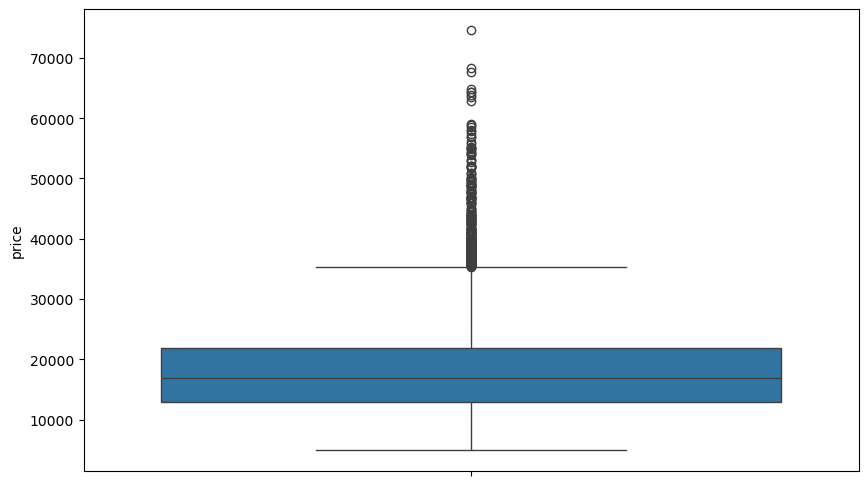

In [38]:
sns.boxplot(df.price);

# We can also gain insights about outliers through the boxplot. However, these insights may be misleading. 
# Therefore, we will base our evaluation not on the entire dataset, 
# but on groups within the data (e.g., Audi A1, Audi A3, Renault Clio, etc.).

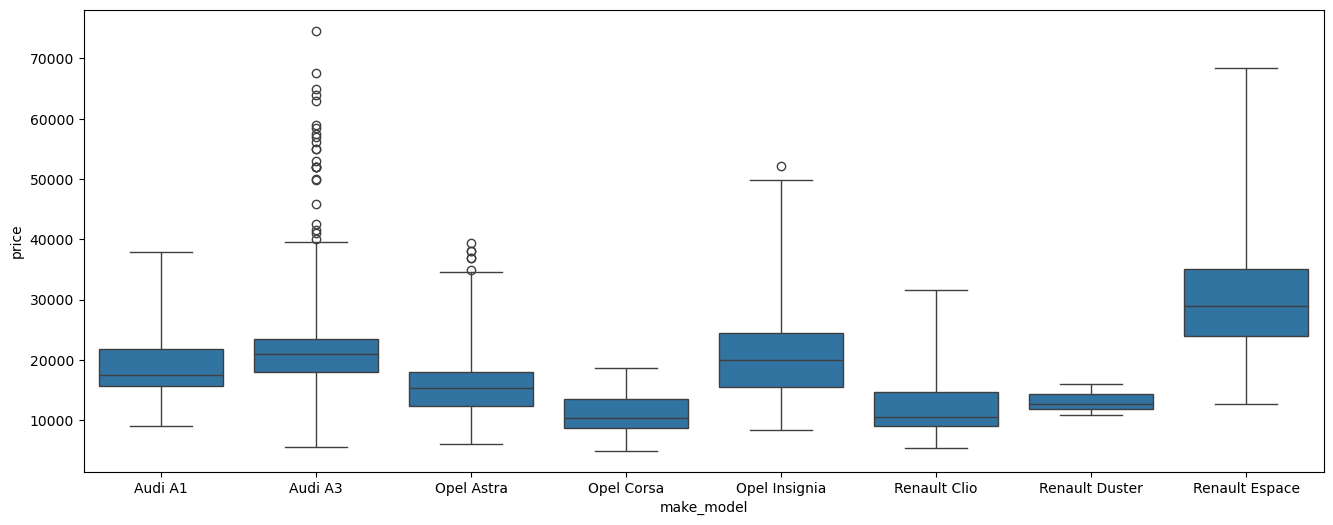

In [39]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# Looking at the visualizations below, we can identify potential outliers for Audi A3, Opel Astra, Opel Insignia, and Renault Clio based on the three whiskers of the boxplot. 
# In your own datasets, you can determine separate whisker values for each group according to these visuals.

# To calculate the IQR, the following steps are followed:

# 1. The data is sorted from smallest to largest.
# 2. The first (Q1) and third (Q3) quartiles representing 25% and 75% of the data are calculated.
# 3. The IQR is obtained by subtracting Q1 from Q3.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_lim = Q1 - 1.5 * IQR
# upper_lim = Q3 + 1.5 * IQR

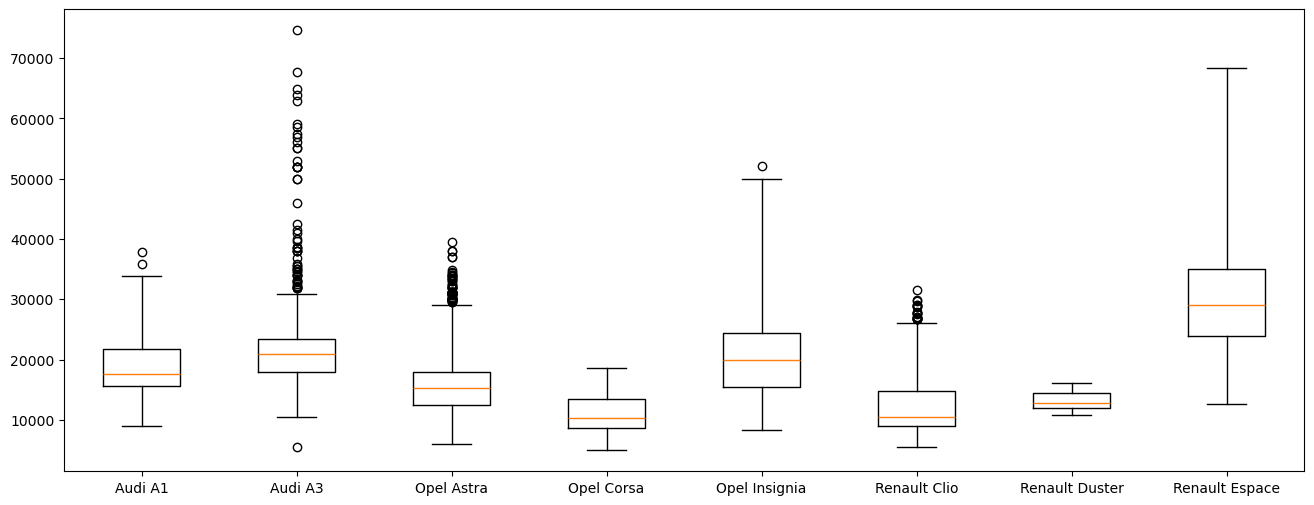

In [40]:
# Seaborn's boxplot function uses the same 'whis' value for all categories, so to plot each category separately, 
# we will use matplotlib's boxplot function instead.


whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

plt.figure(figsize=(16,6))

for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    plt.boxplot(model_data, positions=[i], whis=whisker_values[make_model], widths=0.5)
    
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()

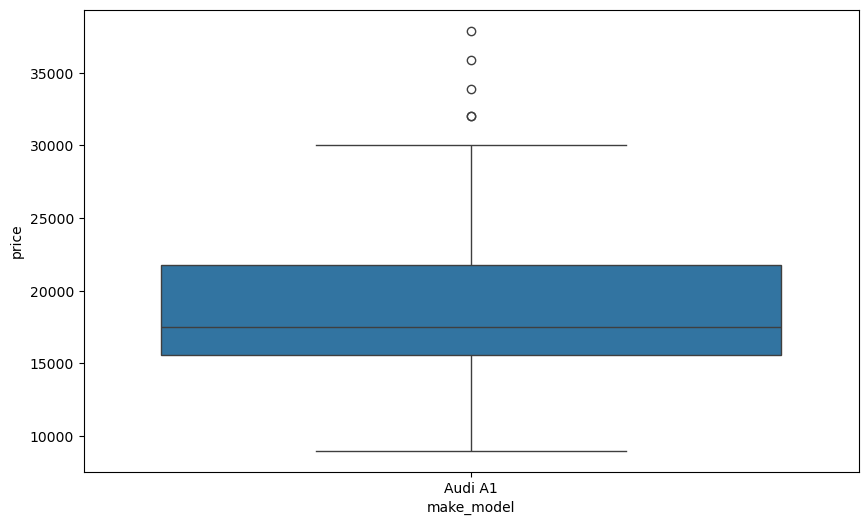

In [41]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [42]:
df[df["make_model"]== "Audi A1"]["price"]

# Audi A1 prices. We will use this code to try to identify outlier values for each car.

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2377, dtype: int64

In [43]:
# Based on the 1.5 whisker value, we are identifying observations that could be potential outliers for each group.


total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## Get dummies 

**get_dummies()** yöntemi, kategorik sütunları ikili kodlama yaparak yeni sütunlara dönüştürür.

Her bir kategori, bir özellik olarak kodlanır ve özellik varsa 1, yoksa 0 olarak kodlanır.

In [46]:
# This code parses the comma-separated text in each cell of our columns, 
# creating a new DataFrame where each item of the text is represented as a separate column.


df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [47]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [48]:
df = pd.get_dummies(df, drop_first =True)

# The `drop_first=True` parameter removes the column representing the first category of each feature. 
# This is done to prevent overfitting and multicollinearity.

# For example, if the "Fuel_Type" column has three categories like "Diesel", "Gasoline", and "LPG", 
# only two columns (e.g., "Gasoline" and "LPG") will be encoded, and the "Diesel" category will be used as the reference.
# This way, the "Gasoline" and "LPG" columns are associated with the "Diesel" category, 
# preventing any multicollinearity issues.
# Depending on the version of Pandas, the output might be displayed as 0/1 instead of True/False.


In [49]:
# Converts the boolean values in the DataFrame to integers.


bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [50]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [51]:
df.shape

(14241, 133)

In [52]:
df.isnull().any().any()

False

In [53]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# We are examining the correlations between all features in our dataset and the target.
# We sort the correlations with the target, which is "price", from smallest to largest.
# Since we don't want to see the correlation with the target itself, we slice ([:-1]) to ignore the target (-1).


age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


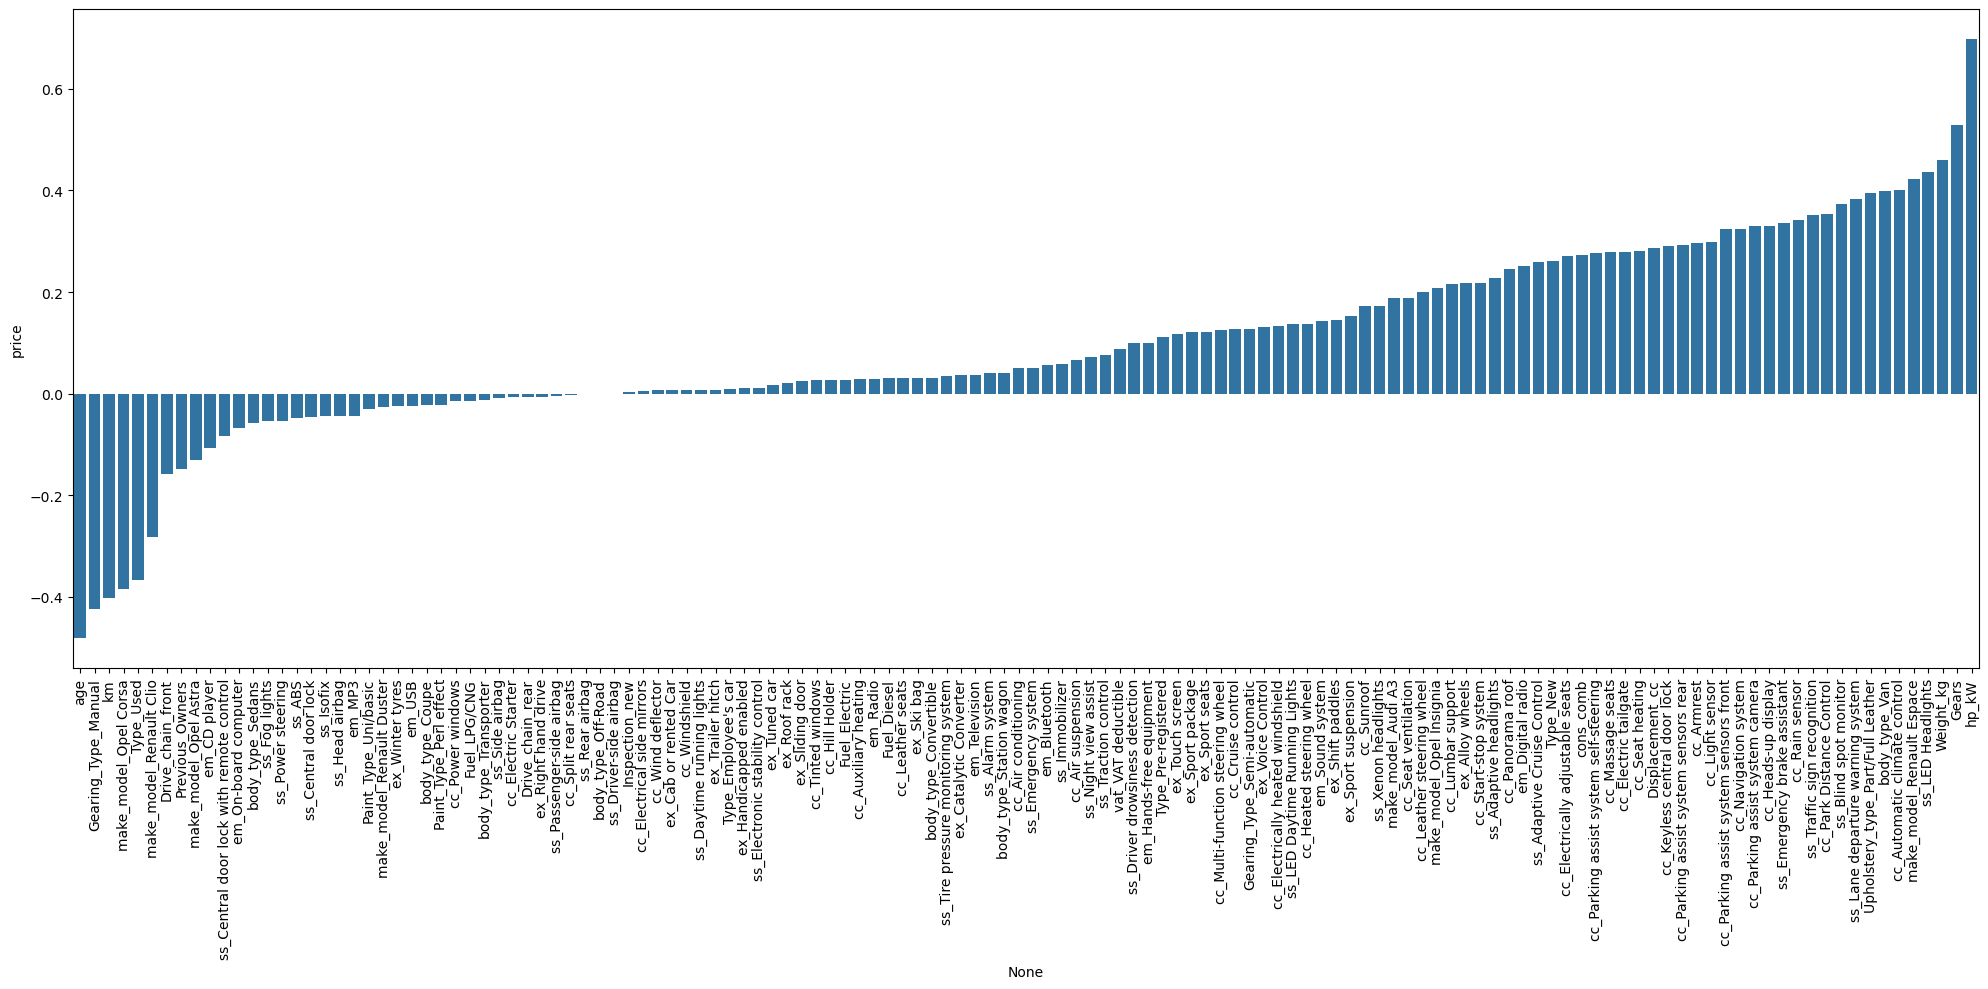

In [54]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# We are visualizing the correlations between the features and the target.

# Train | Test Split

**random_state=42**

**test size = 0.2**

**Train-Test Split in Machine Learning**

In machine learning, **train-test split** is a technique used to evaluate the performance of a model. The dataset is divided into two parts:

1. **Training Set**: This subset is used to train the machine learning model. The model learns from this data and adjusts its parameters accordingly.
  
2. **Test Set**: This subset is used to evaluate the model's performance. It consists of data that the model hasn't seen during training, allowing us to assess how well the model generalizes to unseen data.

Typically, the data is split into 70%-80% for training and 20%-30% for testing. This split helps in identifying overfitting or underfitting issues and ensures that the model is not just memorizing the data but can perform well on new, unseen data. 

In Python, this can be done using the `train_test_split` function from the `sklearn.model_selection` module.


In [58]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [59]:
X= df.drop(columns="price")
y= df.price

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We split the data into train and test sets using the `train_test_split` function after training the model to make predictions.
# By default, `test_size=0.25`.
# Best practice typically involves using values around 0.2, 0.25, or 0.3 for the test set size. The goal is to provide as much data as possible to the train set.
# For smaller datasets, this ratio can be adjusted to around 0.1 or 0.15.

# By using `random_state`, we randomly split the data into train and test sets and ensure that the same data is sent to the train and test sets each time.

In [61]:
X_train.shape

(11392, 132)

In [62]:
X_test.shape

(2849, 132)

# Implement Linear Regression

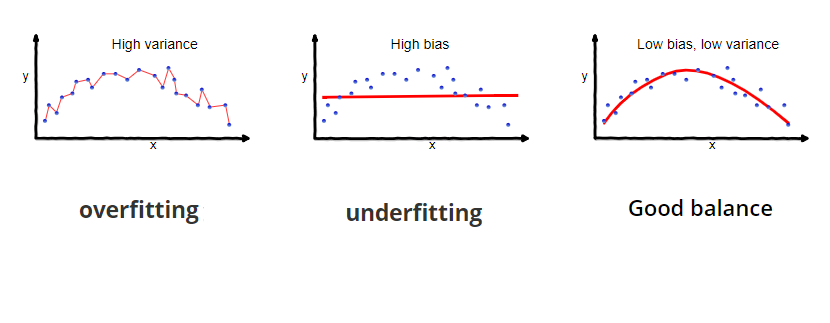

## Model

In [66]:


def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [67]:
from sklearn.linear_model import LinearRegression 

In [68]:
lm = LinearRegression() 

# We always assign our algorithm to a variable. Otherwise, we will encounter an error when making predictions.


In [69]:
lm.fit(X_train,y_train)

# If we write `LinearRegression()` instead of `lm`, the code will work. However, when you try to make predictions with `LinearRegression()`, you'll encounter an error.
# To avoid this error, we must always assign the model to a variable, like `model = LinearRegression()`, before making predictions.


LinearRegression()

In [70]:
train_val(lm, X_train, y_train, X_test, y_test)

# First, we evaluate our metrics on the test set.
# Then, we calculate the metrics on the training set and compare the scores obtained on the unseen data (test set) with the scores on the training data.
# If the scores are similar, it indicates that the model is generalizing well.
# However, if there is a significant difference between the scores, it means the model is not generalizing well.


,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


## Adjusted R2 Score

In [72]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)      
    n = df.shape[0]                   
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  
    return adj_r2

In [73]:
y_pred = lm.predict(X_test)


In [74]:
adj_r2(y_test, y_pred, df)


0.8828492602064296

## Cross Validate



### Steps in Cross-validation:

1. **Splitting the Data**: The dataset is divided into K folds, typically 5 or 10.
2. **Training and Testing**: The model is trained on K-1 folds and tested on the remaining fold. This process is repeated K times, each time using a different fold as the test set.
3. **Performance Evaluation**: The model’s performance is averaged over the K iterations, providing a more reliable estimate of its generalization ability.

### Benefits of Cross-validation:
- It helps reduce overfitting by testing the model on different subsets of data.
- It provides a better estimate of model performance compared to a single train-test split.
- It is particularly useful when the dataset is small.

In [77]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [78]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.032,0.005,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.032,0.003,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.031,0.003,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.030,0.003,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.030,0.003,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.030,0.003,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.032,0.003,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.030,0.002,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.033,0.004,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.037,0.004,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [79]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [80]:
train_val(lm, X_train, y_train, X_test, y_test)

# The train and test set scores obtained from the train_val function provide insights into whether there is overfitting in our data.

# However, to truly determine if overfitting exists, we compare the train and validation scores obtained from cross-validation (CV).

# Additionally, to check if the test scores we present to the client are consistent, we compare them with the validation scores obtained from CV.
# If the scores are similar, we consider them consistent; if they differ significantly, we consider them inconsistent.


,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [81]:
2501/df.price.mean()

# Since we are looking at the error in terms of averages, we will calculate the ratio of the mean error (average of error metrics) to the mean of the predicted value.
# This ratio will indicate how much error we are making relative to the predicted value.

# Based on the RMSE score from the test set (hold-out set) that we present to the client,
# our model is making an average error of approximately 13.9%.


0.13817480842212715

## Prediction Error

In [83]:
# sklearn.__version__
# pip install scikit-learn==1.2.1 --user

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

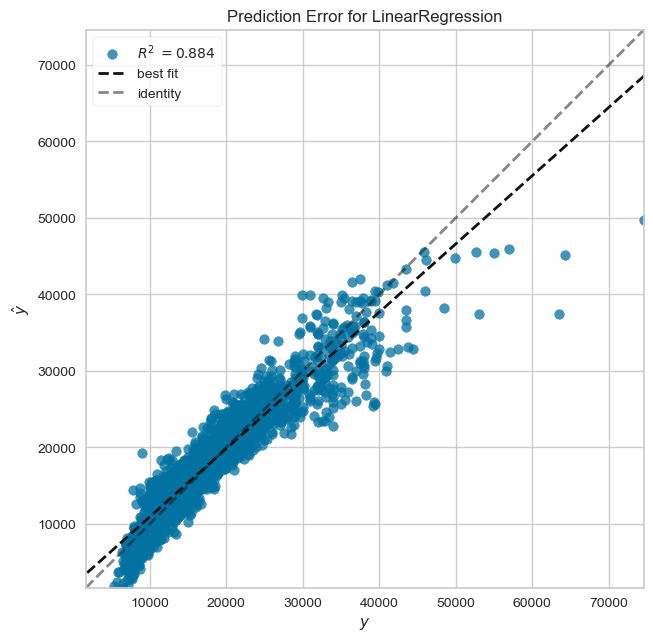

In [84]:
# hatalarımızın nasıl dağıldığına bakacağız
# modelimizi reset edeceğiz
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# The prediction error visual allows us to assess how good our model's predictions are.
# We train the model on the train data and evaluate the scores on the test data, then plot the graphs.

# On the y-axis, we have our predictions, and on the x-axis, we have the actual values.
# The faint (gray) identity line represents the points where the model's predictions are perfect,
# and the dark line represents the best fit line that our model has learned after training.
# The closer the dark line is to the gray line, the better the model's predictions.

# If the identity line and the predicted values' difference is zero, it means the residuals are zero and the R2 value is 1.

# Looking at the visual, we can observe that cars with prices above 40,000 EURO are pulling the best fit line down.
# If I remove these cars or the outliers with high prices that I detect by model or by price ranges, and retrain the model on this cleaned data,
# I may achieve better scores.


## Residual Plot

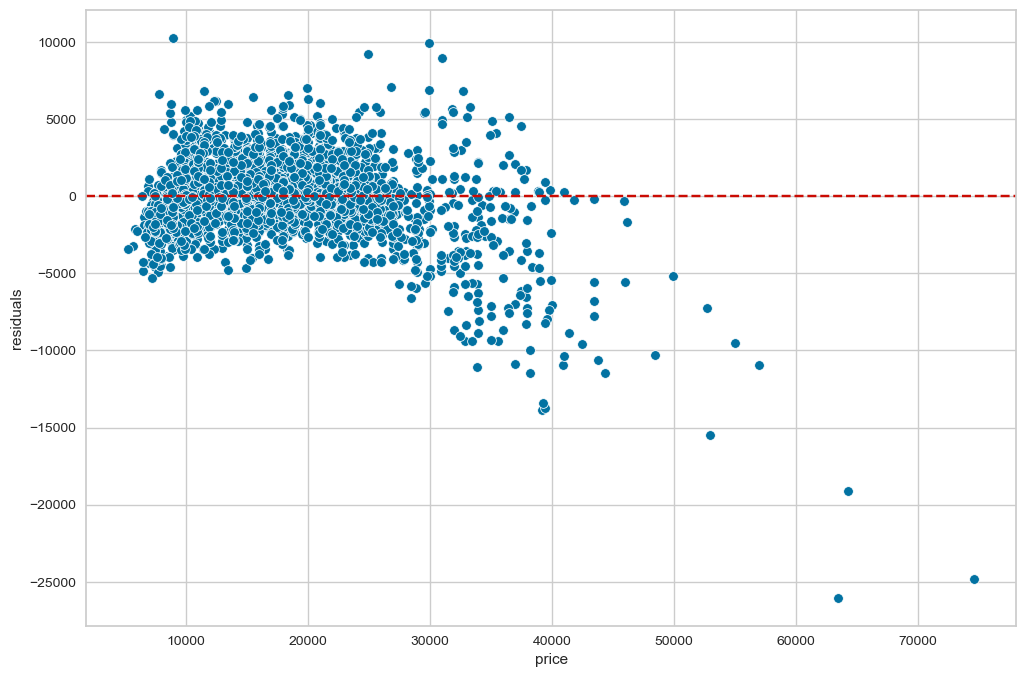

In [86]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# When error terms are calculated as negative values, the values on the y-axis of the graph are made positive.
# This makes the differences in the magnitudes of the error terms more clearly visible.

# Residuals:
# 1- The errors should be evenly and randomly distributed on both sides of the axis where the error is zero,
#    and there should be no discernible pattern.
# 2- This distribution should be approximately normally distributed.

# If these conditions are met, we can say that the data is suitable for linear regression.


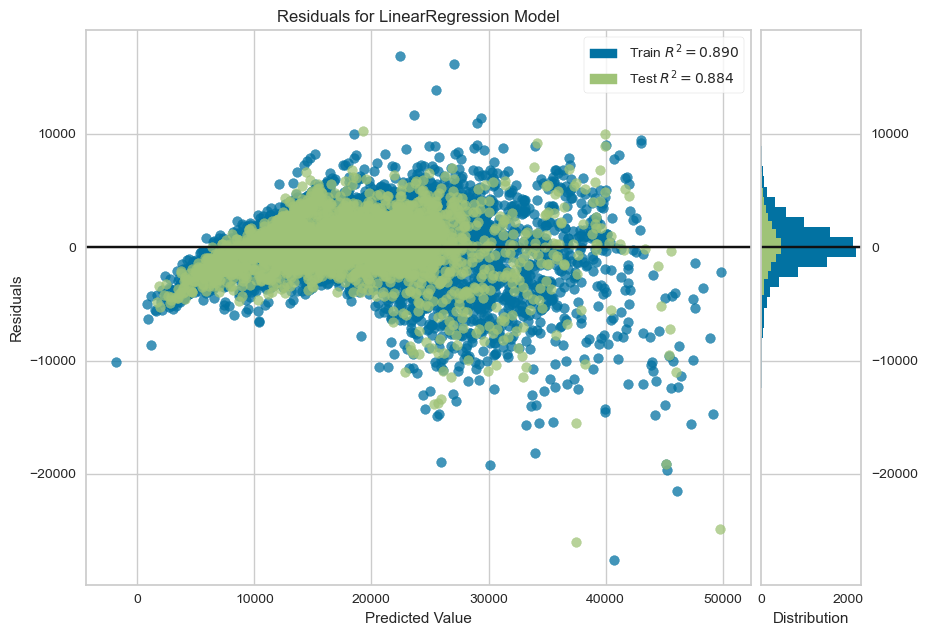

In [87]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

In [89]:
df1 = df[~(df.price>35000)]
df1.head()

# To filter rows where the price is not greater than 35,000, the tilde (~) operator is used to negate a logical value.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [90]:
len(df[df.price>35000])

473

In [91]:
df0[df0.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [92]:
df0.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [93]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [94]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

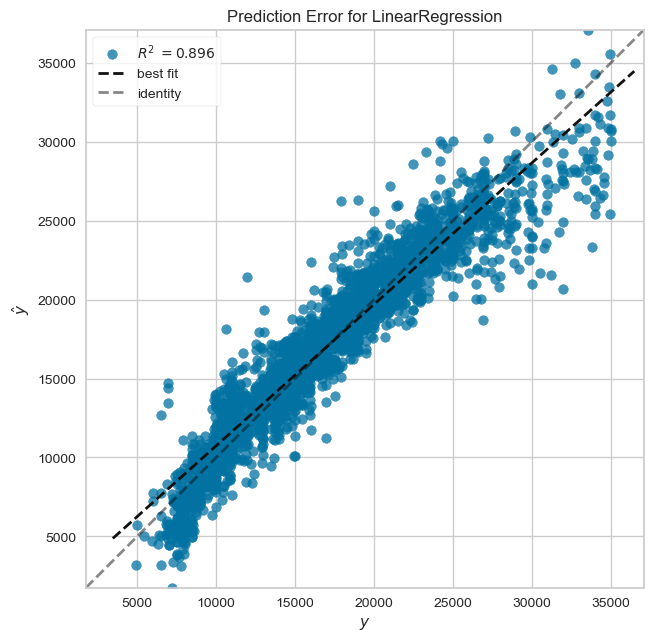

In [95]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [96]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [97]:
1894/df1.price.mean()

# Before removing outliers, our average prediction error was 13.81%, which decreased to 10.93% after removing the outliers.
# This indicates an improvement of approximately 2.88% in our predictions.


0.1093750965362424

In [98]:
2501/df.price.mean()  # The error rate of our first model's predictions.

0.13817480842212715

In [99]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [100]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [101]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
11953,23890,24072.089,-182.089
4044,19400,19327.841,72.159
66,18900,19101.943,-201.943
8065,18100,18313.105,-213.105
14425,21900,20750.417,1149.583
2487,22800,21468.380,1331.620
11898,23980,23892.036,87.964
11017,12980,15030.715,-2050.715
4461,19900,21815.593,-1915.593
2643,18229,19298.818,-1069.818


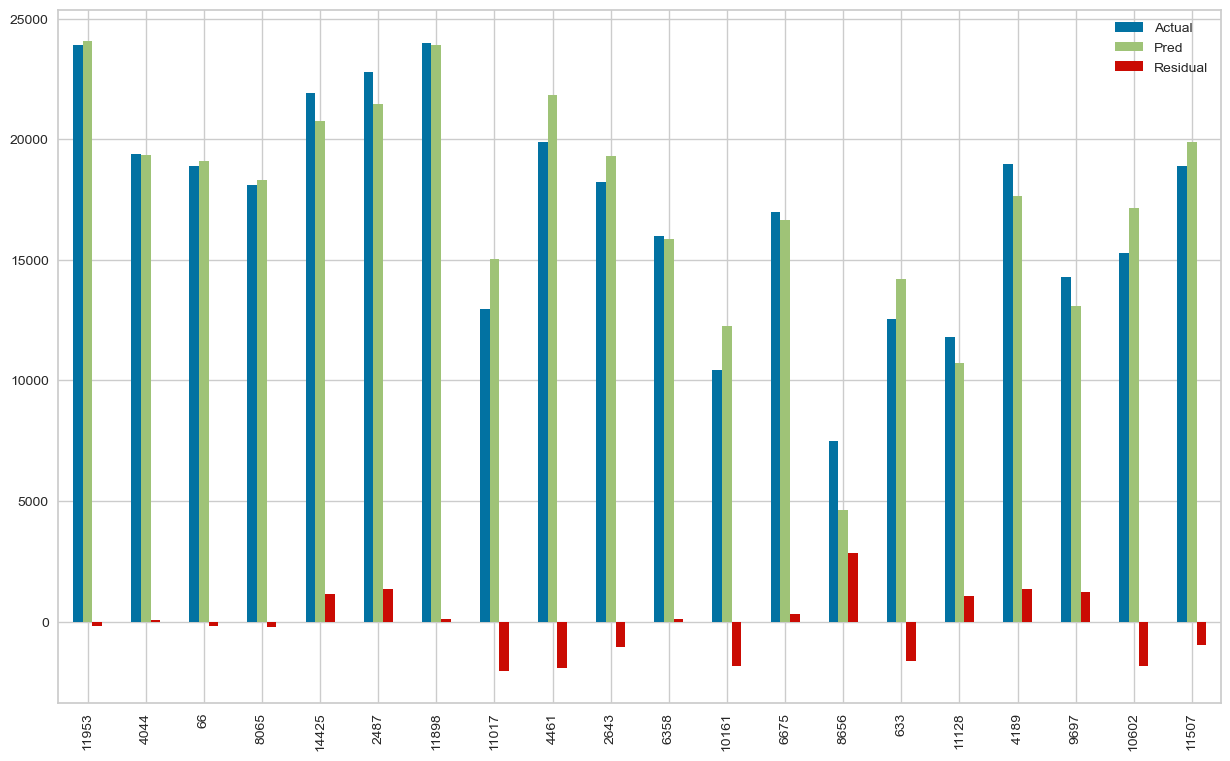

In [102]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [103]:
# We will use the coefficients to see the effect of features on predictions and for feature selection.
# The order of the coefficients is the same as the feature order in the X_train data we provided for training.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9447.389
make_model_Renault Clio,-5424.873
make_model_Opel Corsa,-5245.299
make_model_Opel Astra,-3372.469
Drive_chain_rear,-2859.199
Type_Employee's car,-2090.024
Type_Used,-1975.265
ex_Sliding door,-1618.279
Gearing_Type_Manual,-1581.537
age,-1445.872


## Pipeline

## **What is a Pipeline?**

The concept of a pipeline is used to efficiently and error-free manage data processing and machine learning workflows:

A Pipeline allows you to sequence data preprocessing and modeling steps in a single flow. In the Scikit-learn library, a Pipeline combines data transformation operations and a prediction model (estimator) into one seamless process.

**Benefits of Using a Pipeline**

1. **Code Readability and Cleanliness**: By consolidating all processing steps into one structure, it enhances code readability and maintenance.

2. **Prevents Data Leakage**: Especially when data preprocessing steps are done before model training, it prevents future data from leaking information. The pipeline performs these operations separately for each training subset, reducing the risk of data leakage.

3. **Ease of Hyperparameter Tuning**: During cross-validation and hyperparameter tuning, you can adjust and manage the parameters of all the steps within the pipeline from a single point.

**Steps to Create and Use a Pipeline**

1. **Defining Processing Steps**: First, identify the transformation steps (e.g., scaling, categorical data transformation) to apply to your data.

2. **Creating the Pipeline**: You create a pipeline object containing the processing steps and the chosen prediction model.

3. **Training the Pipeline**: You "fit" the pipeline on the training dataset to apply all transformations and train the model.

**Summary**

Using a pipeline makes data science and machine learning workflows more efficient and reliable. By ensuring that each step is applied in the correct order and only on the training data, it prevents data leakage and improves the model’s generalization ability. Additionally, it simplifies the process of model selection and parameter tuning, reducing the risk of errors.


In [106]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

In [107]:
pipe_model = Pipeline(steps=operations)


In [108]:
pipe_model.fit(X_train, y_train)
 

Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [109]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


# Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [113]:
# Ridge regresyon algoritmasında eğitim yapacağımız veri mutlaka ölçeklendirilmiş olmalıdır. 
# Bu işlem, tüm featurelara model tarafından eşit ağırlıklandırma yaparak hem multicollinearity sorununu giderir 
# hem de featureları önemli-önemsiz olarak gruplandırabilir.

# Neden MinMax scaling kullanıyoruz? 
# Çünkü get_dummies ile 0-1 arasında dönüştürdüğümüz featurelarımız olduğu için,
# MinMax scaling ile tüm verilerimizi 0-1 aralığına sığdırmak önemlidir.

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hedef değişkeninin scale edilmesi linear regresyon için gerekli değildir, çünkü hedef değişken katsayıların
hesaplanmasında kullanılmaz.**

## Model

In [116]:
from sklearn.linear_model import Ridge

In [117]:
ridge_model = Ridge(alpha=1, random_state=42) #default alpha=1 

# Alpha, Ridge regresyonunun hyperparametresidir. Bu değer büyüdükçe uygulanan regularization (ceza) kuvveti artar.
# Overfitting'i yenmek için bu hyperparametre artırılmalıdır.


In [118]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [119]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.716,1412.912
mse,3794938.109,3829231.926
rmse,1948.060,1956.842


## Finding best alpha for Ridge

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# GridSearchCV (GS) algoritması, öncelikle ilgili hyperparametre (HP) için bir uzay aralığı ister. 
# Bunun için GS'e vereceğimiz uzay aralığını belirliyoruz. (Örneğin, 0.01 ile 100 arasında eşit aralıklarla bölünmüş 100 farklı değer veriyoruz.)

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [123]:
ridge_model = Ridge(random_state=42) 


In [124]:
param_grid = {"alpha":alpha_space}

# Hyperparameter uzaylarını bir dictionary içerisine, ML algoritmasında geçen hyperparameter (HP) isimleriyle yazıyoruz.
# HP karşısına bir liste veya array olarak uzayı tanımlıyoruz. 
# Burada alpha karşısına tanımladığımız alpha_space değişkeninin 100 öğeli bir array olduğuna dikkat edin.

In [125]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# Ridge ML modelinin scorlarının hangi metrikle iyileştirileceğini belirlemek için scoring parametresi karşısına 
# ilgili metriği yazıyoruz. Tek bir metrik yazabiliriz. Default değeri R2_score'dur.

# GridSearchCV, istediğimiz metriği maximize edecek şekilde hyperparameter uzayındaki tüm değerler için 
# ayrı ayrı datanın farklı bölgelerinden scorlar alır (cv'de belirttiğimiz sayıya göre) ve bunların ortalamasını 
# hesaplar. Ortalaması en yüksek olan hyperparameter değer/değerlerini döndürür.

# Default cv sayısı 5'tir.

# GridSearchCV aynı zamanda Cross Validation işlemi de yaptığı için, validation ve train seti scorlarını 
# elde edebilmek için return_train_score=True olarak belirtiyoruz. (scoring parametresi karşısına yazdığımız 
# metriğin scorunu döndürür sadece)

In [126]:
ridge_grid_model.fit(X_train_scaled,y_train) 


GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [127]:
ridge_grid_model.best_params_



{'alpha': 1.02}

In [128]:
ridge_grid_model.best_estimator_


Ridge(alpha=1.02, random_state=42)

In [129]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072,0.013,0.002,0.000,0.010,{'alpha': 0.01},-1978.044,-1937.280,-1904.261,-1955.055,-1906.690,-2060.461,-2055.468,-1998.684,-2069.129,-1949.457,-1981.453,59.107,2
1,0.067,0.014,0.002,0.001,1.020,{'alpha': 1.02},-1972.226,-1938.831,-1906.079,-1958.467,-1906.059,-2058.752,-2056.446,-1998.056,-2066.640,-1947.015,-1980.857,58.403,1
2,0.070,0.009,0.003,0.002,2.030,{'alpha': 2.03},-1969.822,-1941.251,-1908.777,-1961.840,-1906.768,-2059.557,-2058.102,-1998.319,-2065.378,-1946.208,-1981.602,57.915,3
3,0.071,0.009,0.003,0.001,3.040,{'alpha': 3.04},-1969.348,-1944.208,-1911.925,-1965.138,-1908.255,-2061.121,-2060.132,-1999.156,-2064.876,-1946.351,-1983.051,57.453,4
4,0.075,0.009,0.003,0.001,4.050,{'alpha': 4.05},-1970.051,-1947.502,-1915.303,-1968.368,-1910.222,-2063.062,-2062.377,-2000.381,-2064.899,-1947.097,-1984.926,57.003,5
5,0.072,0.006,0.004,0.002,5.060,{'alpha': 5.06},-1971.508,-1951.005,-1918.792,-1971.537,-1912.497,-2065.218,-2064.748,-2001.877,-2065.300,-1948.246,-1987.073,56.564,6
6,0.071,0.007,0.002,0.001,6.070,{'alpha': 6.07},-1973.465,-1954.635,-1922.322,-1974.651,-1914.972,-2067.500,-2067.190,-2003.566,-2065.985,-1949.677,-1989.396,56.137,7
7,0.071,0.005,0.003,0.001,7.080,{'alpha': 7.08},-1975.759,-1958.335,-1925.853,-1977.713,-1917.577,-2069.857,-2069.668,-2005.395,-2066.885,-1951.311,-1991.835,55.724,8
8,0.071,0.006,0.004,0.002,8.090,{'alpha': 8.09},-1978.283,-1962.068,-1929.359,-1980.728,-1920.267,-2072.254,-2072.162,-2007.325,-2067.952,-1953.094,-1994.349,55.326,9
9,0.070,0.010,0.003,0.002,9.100,{'alpha': 9.1},-1980.964,-1965.807,-1932.826,-1983.697,-1923.009,-2074.667,-2074.658,-2009.329,-2069.150,-1954.989,-1996.910,54.941,10


In [130]:
ridge_grid_model.best_index_


1

In [131]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.712,1412.875
mse,3795015.419,3829086.131
rmse,1948.080,1956.805


In [132]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [133]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")


,Coef
km,-11101.861
make_model_Renault Duster,-8384.639
make_model_Renault Clio,-5409.447
make_model_Opel Corsa,-5295.138
age,-4382.308
make_model_Opel Astra,-3334.959
Displacement_cc,-2271.755
Type_Employee's car,-2076.174
Type_Used,-1967.430
Drive_chain_rear,-1817.244


# Implement Lasso Regression

## Model

In [136]:
from sklearn.linear_model import Lasso

In [137]:
lasso_model = Lasso(random_state=42, alpha=1)


In [138]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [139]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.170,1409.010
mse,3806483.613,3814782.540
rmse,1951.021,1953.147


## Finding best alpha for Lasso

In [141]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [142]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [143]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [144]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [145]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [146]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11128.712
make_model_Renault Duster,-7501.018
make_model_Renault Clio,-5364.928
make_model_Opel Corsa,-5287.867
age,-4382.958
make_model_Opel Astra,-3332.248
Type_Employee's car,-1985.696
Displacement_cc,-1960.999
Type_Used,-1890.448
Gearing_Type_Manual,-1619.269


# Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Model

In [150]:
from sklearn.linear_model import ElasticNet

In [151]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [152]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.584,0.592
mae,3099.732,3053.445
mse,15472875.539,15016869.532
rmse,3933.558,3875.161


## Finding best alpha and l1_ratio for ElasticNet

In [154]:
elastic_model = ElasticNet(random_state=42)

In [155]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [156]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [157]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [158]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [159]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

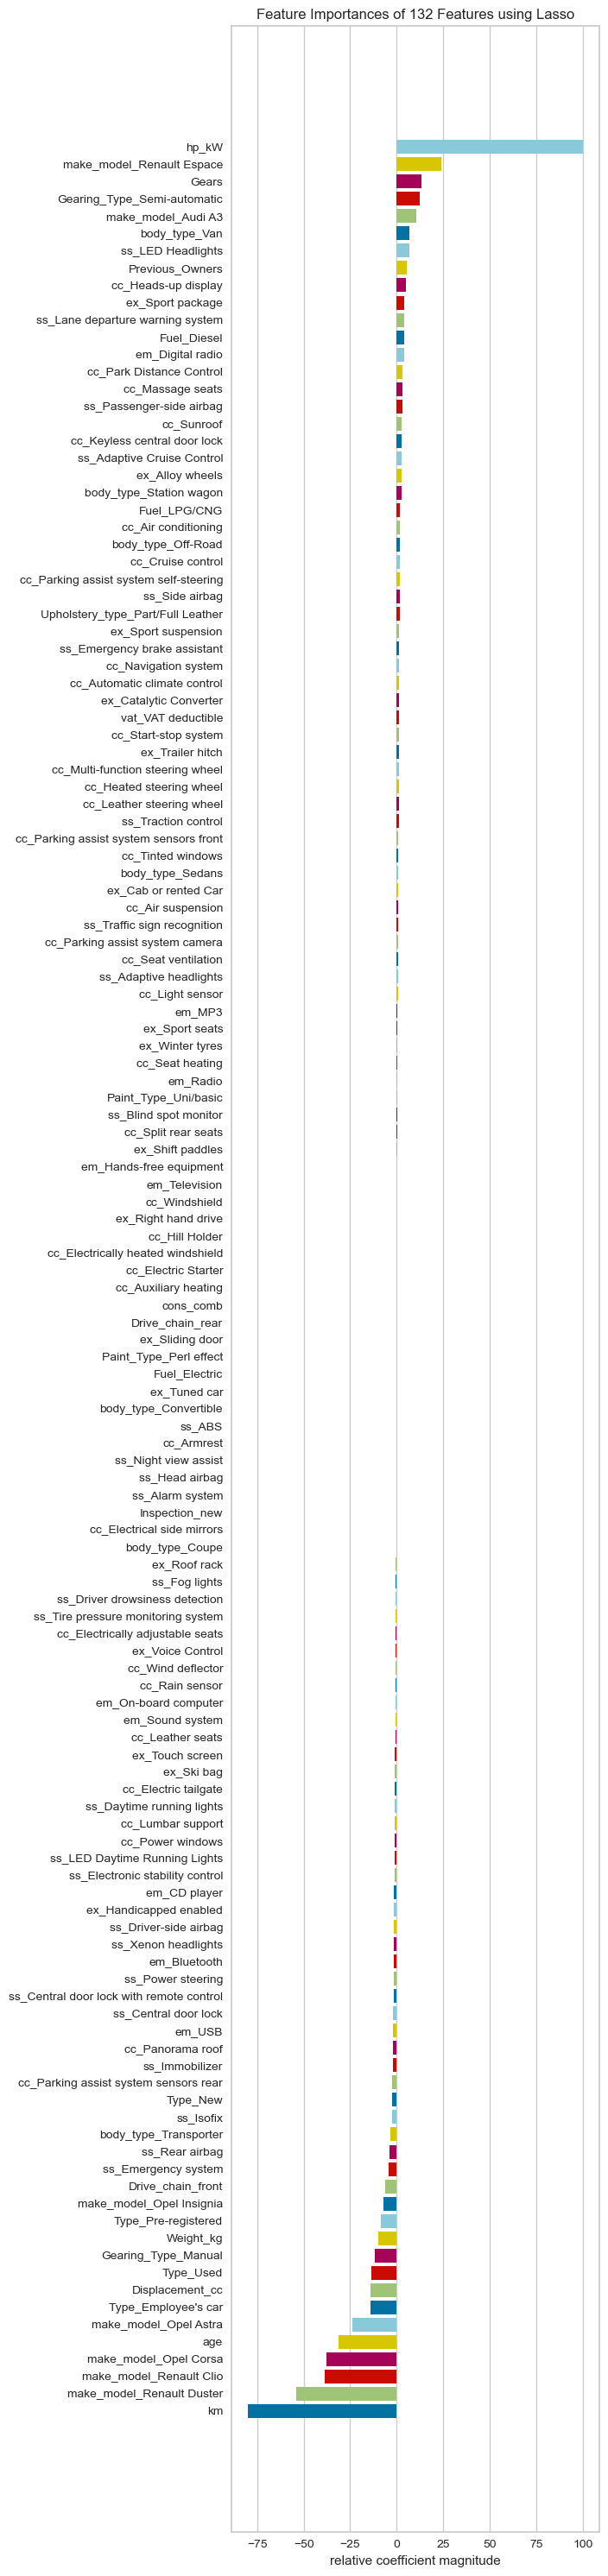

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [161]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()


In [162]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# We are selecting the top 5 features that have the most impact on prediction.
# You may wonder why the make_model feature was selected. When we examine the visual above,
# we can see that among the most impactful features for prediction, the unique categorical
# observations of the make_model feature (such as Audi A3, Audi A1, Renault Espace, etc.) were included,
# so we selected the make_model feature as well.

In [163]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [164]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [165]:
df_new.drop(index=[2614], inplace=True)

In [166]:
df_new = df_new[~(df_new.price > 35000)]

In [167]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False


In [168]:
len(df_new)

15419

In [169]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [171]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [173]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [174]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [175]:
lasso_final_model.best_score_

-2239.588352950935

In [176]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [177]:
2132 / df_new.price.mean()

0.1233209499596912

In [178]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [180]:
# We assign the metrics obtained from all models to the 'scores' variable. Then, to display the model names
# in the index and the metrics in the features, we take the transpose of the dataframe..

scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "final_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144
final_m,0.877,1553.998,2132.539


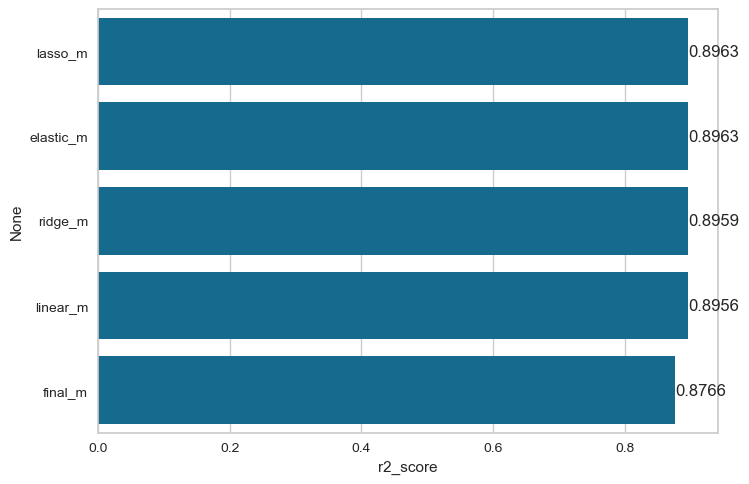

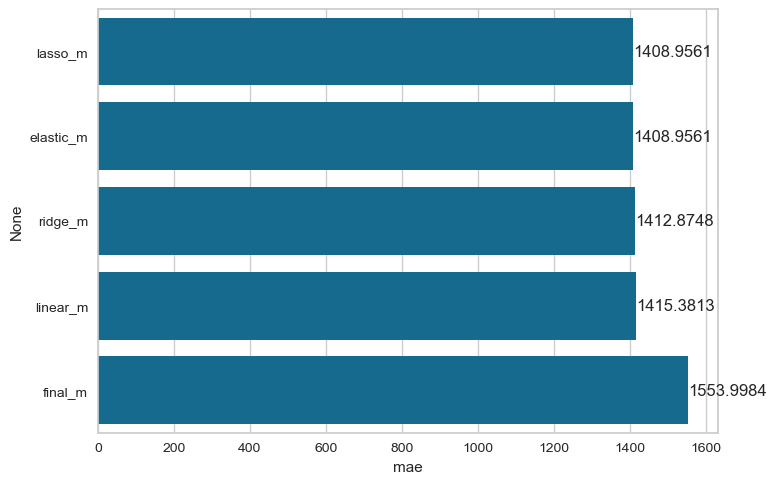

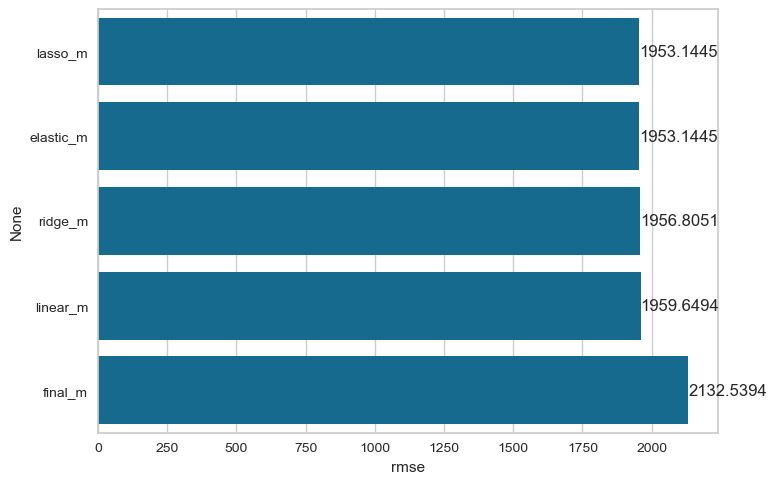

In [181]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False 
    else:
        ascending = True 
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

# Prediction

## Prediction with new observation

In [184]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [185]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [186]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [187]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [188]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [189]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [190]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,True,True


In [191]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,True,False,False,False,False,False,False,False,True,False,False


In [192]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,True,0,0,0,0,0,0,True,0,0


In [193]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [194]:
final_model.predict(my_dict)

array([19559.29001107])

## Prediction with random samples

In [196]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [197]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [198]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [199]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [200]:
random_samples = df_new.sample(n=20)

In [201]:
X_random = random_samples.drop(columns=["price"])

In [202]:
X_random = final_scaler.transform(X_random)

In [203]:
predictions = final_model.predict(X_random)
predictions

array([21461.4425058 , 29007.78803745, 20103.50340451, 13844.09191457,
       17633.6345637 , 22257.82523305, 16454.2033769 , 30960.10206602,
        9547.83433744, 18945.9425028 , 12480.39978221, 21109.42234983,
        9110.47548378, 23194.23096816, 13307.86867409, 21610.28752851,
       23178.16503742, 13739.51454887, 14698.99586842,  3047.34825008])

In [204]:
true_labels = random_samples["price"].values
true_labels

array([24195, 34200, 16460, 13990, 17560, 23025, 15990, 31900,  8500,
       19990, 11169, 20889,  9500, 23940, 13980, 22785, 22300, 13470,
       14200,  7250], dtype=int64)

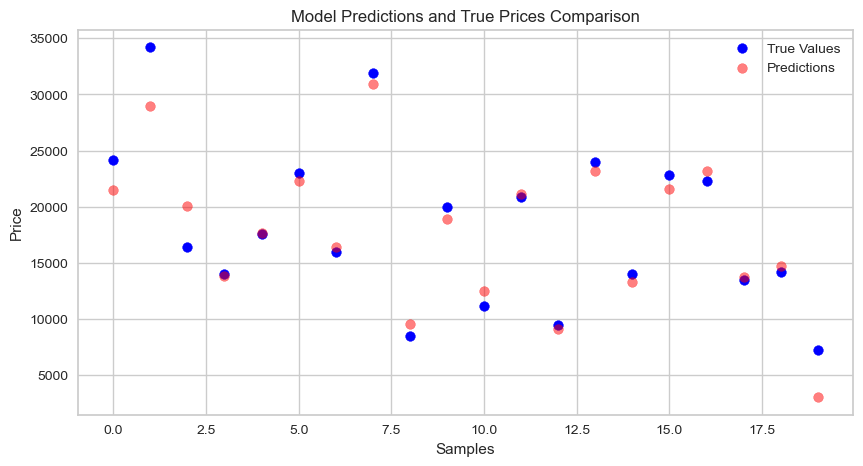

In [205]:
plt.figure(figsize=(10, 5)) 
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='True Values')  
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.5)  
plt.title('Model Predictions and True Prices Comparison') 
plt.xlabel('Samples') 
plt.ylabel('Price')  
plt.legend()  
plt.show()  


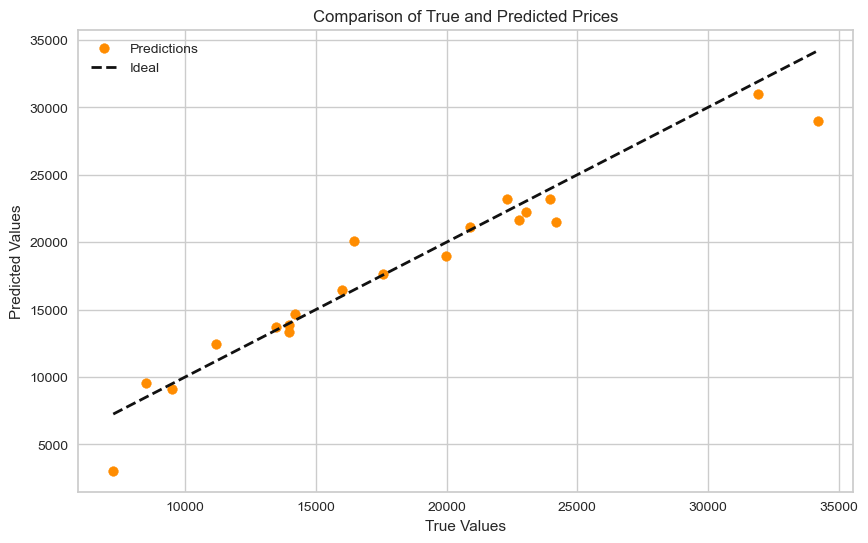

In [206]:
plt.figure(figsize=(10, 6))  
plt.scatter(true_labels, predictions, color='darkorange', label='Predictions') 
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='Ideal')  
plt.xlabel('True Values')  
plt.ylabel('Predicted Values')  
plt.title('Comparison of True and Predicted Prices')  
plt.legend() 
plt.show()  


<p style=" background-color:#FF7F50;font-family:newtimeroman;font-size:200%;color:#fff5ee;text-align:center;border-radius:20px 20px;"><span  style = "padding : 30px; display : block; "><b>THANK YOU!</b></span></p>